# RNA velocity in AVE and Epi-VE cells

In [1]:
%matplotlib inline

In [2]:
import scvelo as scv
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

1.1.2
1.19.2
Running scvelo 0.2.2 (python 3.7.7) on 2021-06-21 12:54.


In [3]:
#Wrapper for scvelo RNA velocity analysis
def RNAVeloAnalysis(adata):
    scv.pp.filter_genes(adata,min_cells=10) 
    scv.pp.filter_and_normalize(adata, min_counts=20, min_counts_u=10, n_top_genes=3000)
    adata.raw=adata
    scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
    scv.tl.recover_dynamics(adata)
    scv.tl.velocity(adata, mode='dynamical')
    scv.tl.velocity_graph(adata)
    scv.tl.paga(adata, groups='clusters')
    scv.utils.randomized_velocity(adata)

# Load and prepare the data

In [4]:
#CHANGE THIS TO YOUR PATH
data_path='/Users/jonathan/Desktop/MUNCHEN/Project_AVE_migration/DRAFT_PAPER/GIT_REPO/DATA/'

## E5.5

In [5]:
adata_55 = scv.read(data_path+"data_for_velo_55.loom", sparse=True,cache=True)
adata_55.var_names_make_unique()

data_55=pd.read_csv(data_path+'DC_55.csv',index_col=0)

arr=list(adata_55.obs_names)
arr=[s.replace('onefilepercell_SS-sc7784898_and_others_S092J:','') for s in arr]
arr=[s.strip('.sorted.bam') for s in arr]
arr=[s.replace('-','.') for s in arr]

adata_55.obs_names=arr
adata_55=adata_55[list(data_55.index),:]

adata_55.obsm['X_umap']=np.array(data_55[['DC1','DC2']])
adata_55.obs['clusters'] = list(data_55['clusters_anno'])

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## E6.25

In [6]:
adata_625 = scv.read(data_path+"data_for_velo_625.loom", sparse=True,cache=True)
adata_625.var_names_make_unique()

data_625=pd.read_csv(data_path+'DC_625.csv',index_col=0)

#Consider only cells from AVE and EPi-VE
arr=list(adata_625.obs_names)
arr=[s.replace('onefilepercell_25619_3#100_and_others_QQGO2:','') for s in arr]
arr=[s.strip('.sorted.bam') for s in arr]
arr=[s.replace('#','.') for s in arr]

adata_625.obs_names=arr
adata_625=adata_625[list(data_625.index),:]

adata_625.obsm['X_umap']=np.array(data_625[['DC1','DC2']])
adata_625.obs['clusters'] =  list(data_625['clusters_anno'])

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Integrated E5.5 and E6.25

In [7]:
data_tot=pd.read_csv(data_path+'DC_55_625.csv',index_col=0)

adata_tot = adata_55.concatenate(adata_625)

adata_tot.obsm['X_umap']=np.array(data_tot[['DC1','DC2']])
adata_tot.obs['clusters'] =  list(data_tot['clusters_anno'])

# RNA velocity E5.5

In [8]:
RNAVeloAnalysis(adata_55)

# scv.pl.paga(adata_55, basis='umap', size=50, alpha=.3,
#             min_edge_width=2, node_size_scale=1.5,legend_loc='on data')

Filtered out 41609 genes that are detected in less than 10 cells (spliced).
Filtered out 58 genes that are detected 20 counts (spliced).
Filtered out 3194 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 3000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:01:21) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identifi

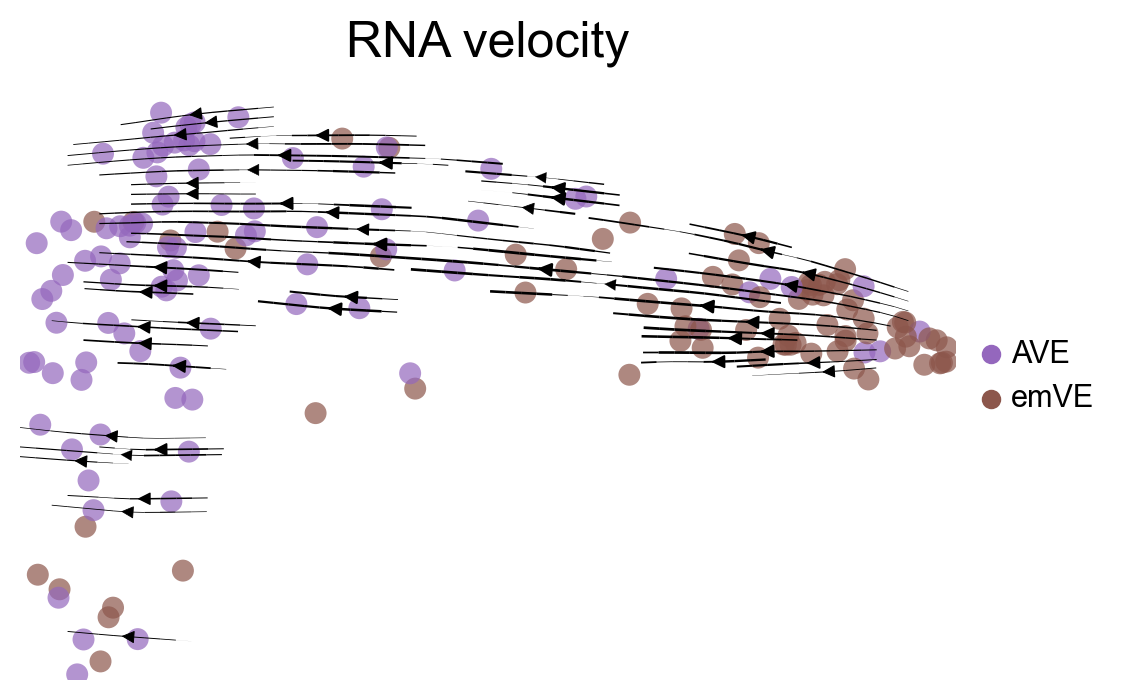

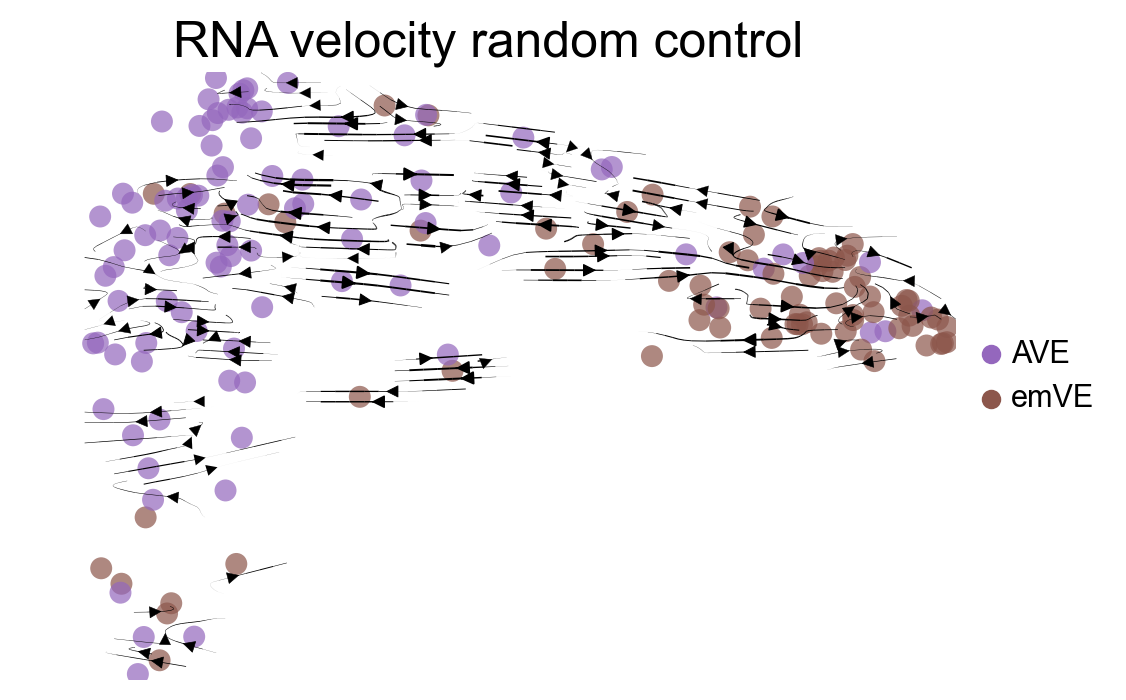

(None, None)

In [11]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax=scv.pl.velocity_embedding_stream(adata_55, vkey=['velocity'],
                                 legend_loc='right_margin'
                                 ,palette=['C4','C5'],linewidth=0.5,
                                 title=['RNA velocity'],size=250,
                                fontsize=18,alpha=0.7,
                                ax=ax,show=False)
# ax.invert_xaxis()
plt.show(),plt.close()
# plt.savefig('RNAvelo_55.svg'),plt.close()
fig,ax=plt.subplots()
ax=scv.pl.velocity_embedding_stream(adata_55,figsize=(8,6), vkey=['velocity_random'],
                                 legend_loc='right_margin'
                                 ,palette=['C4','C5'],size=250,linewidth=0.5,
                                 title=['RNA velocity random control'],
                                fontsize=18,alpha=0.7,
                                ax=ax,show=False)
# ax.invert_xaxis()
plt.show(),plt.close()
# plt.savefig('RNAvelo_randomCtrl_55.svg'),plt.close()




# RNA velocity E6.25

In [12]:
RNAVeloAnalysis(adata_625)

Filtered out 43003 genes that are detected in less than 10 cells (spliced).
Filtered out 46 genes that are detected 20 counts (spliced).
Filtered out 2836 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 3000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:01:18) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identifi

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


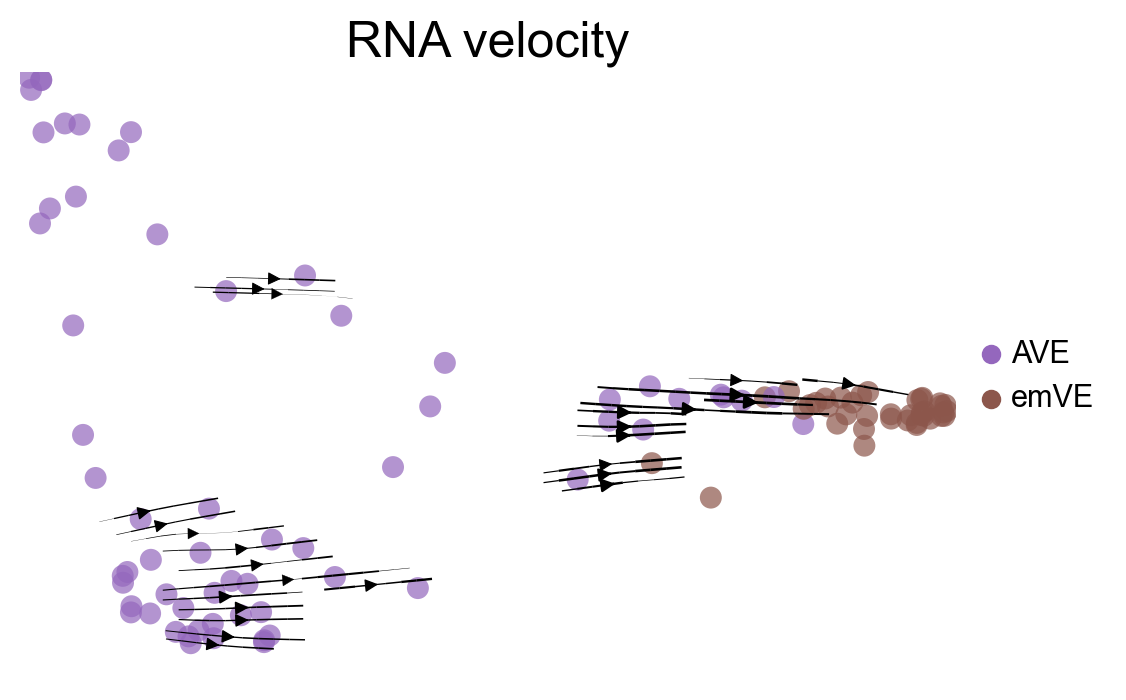

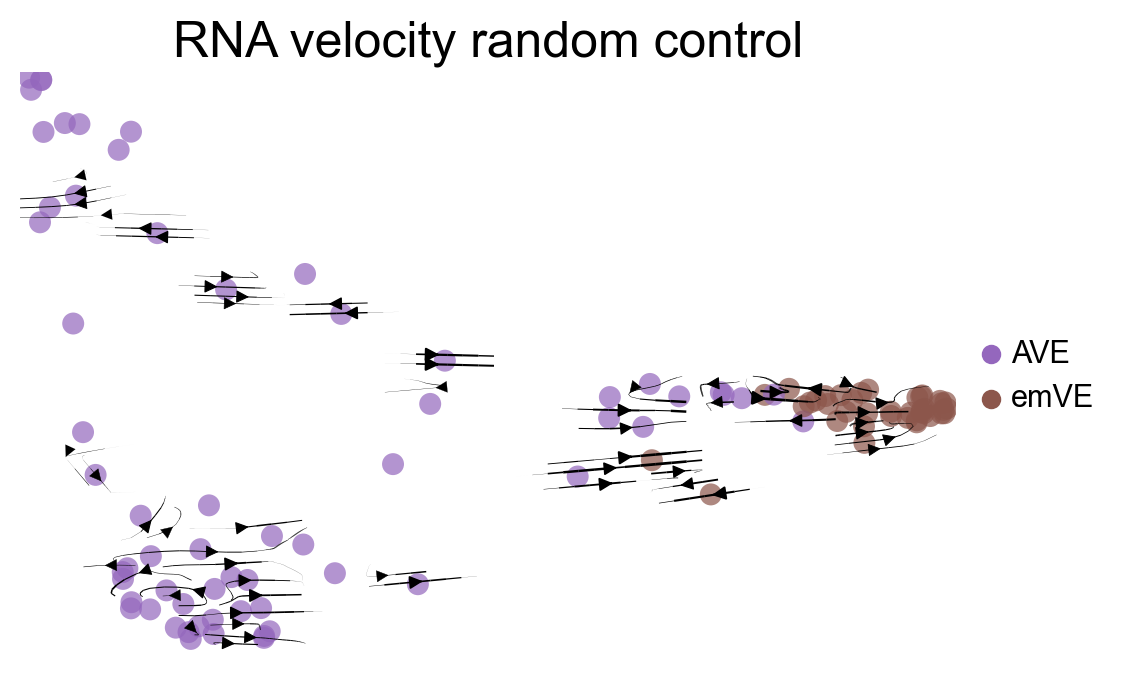

(None, None)

In [13]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax=scv.pl.velocity_embedding_stream(adata_625,figsize=(8,6), vkey=['velocity'],
                                 legend_loc='right_margin'
                                 ,palette=['C4','C5'],size=250,linewidth=0.5,
                                 title=['RNA velocity'],
                                fontsize=18,alpha=0.7,
                                ax=ax,show=False)
plt.show(),plt.close()
# plt.savefig('RNAvelo_625.svg'),plt.close()
fig,ax=plt.subplots()
ax=scv.pl.velocity_embedding_stream(adata_625,figsize=(8,6), vkey=['velocity_random'],
                                 legend_loc='right_margin'
                                 ,palette=['C4','C5'],size=250,linewidth=0.5,
                                 title=['RNA velocity random control'],
                                fontsize=18,alpha=0.7,
                                ax=ax,show=False)
plt.show(),plt.close()
# plt.savefig('RNAvelo_randomCtrl_625.svg'),plt.close()

# RNA velocity E5.5 - E6.25 integrated

In [14]:
RNAVeloAnalysis(adata_tot)

Filtered out 40588 genes that are detected in less than 10 cells (spliced).
Filtered out 92 genes that are detected 20 counts (spliced).
Filtered out 3384 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 3000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:01:57) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identifi

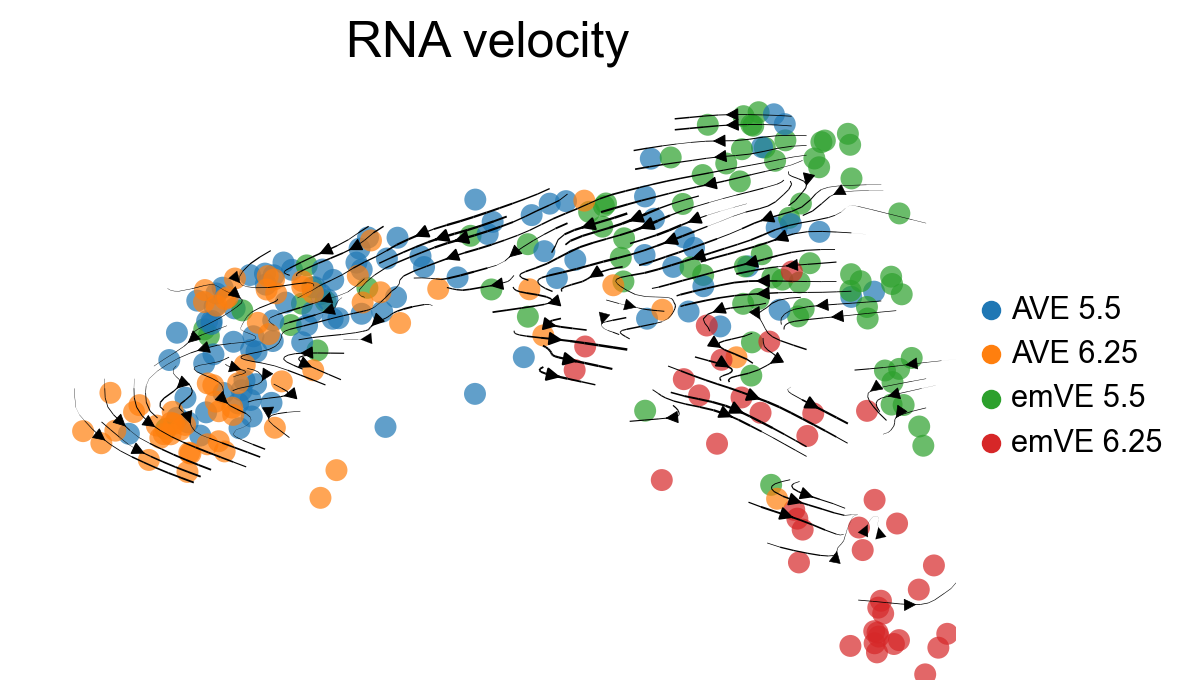

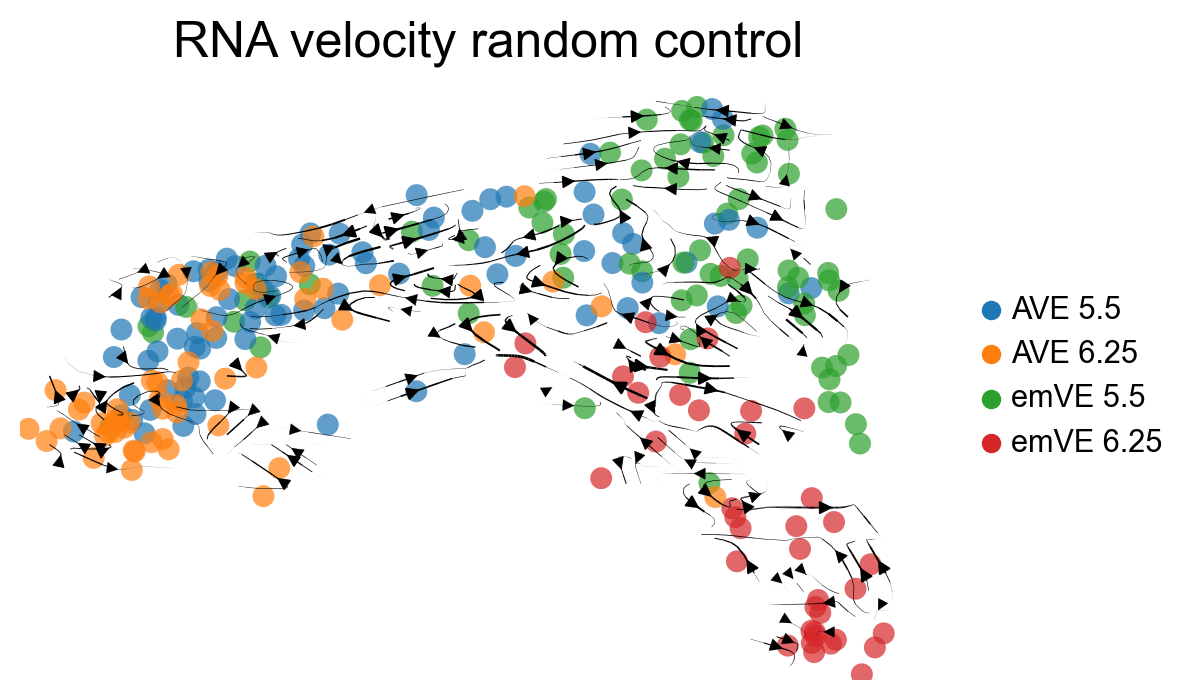

(None, None)

In [16]:
fig,ax=plt.subplots()
ax=scv.pl.velocity_embedding_stream(adata_tot,figsize=(8,6), vkey=['velocity'],
                                 legend_loc='right_margin'
                                 ,size=250,linewidth=0.5,
                                 title=['RNA velocity'],
                                fontsize=18,alpha=0.7,
                                ax=ax,show=False)
# ax.invert_xaxis()
plt.show(),plt.close()
# plt.savefig('RNAvelo_Total.svg'),plt.close()
fig,ax=plt.subplots()
ax=scv.pl.velocity_embedding_stream(adata_tot,figsize=(8,6), vkey=['velocity_random'],
                                 legend_loc='right_margin'
                                 ,size=250,linewidth=0.5,
                                 title=['RNA velocity random control'],
                                fontsize=18,alpha=0.7,
                                ax=ax,show=False)
# ax.invert_xaxis()
plt.show(),plt.close()
# plt.savefig('RNAvelo_randomCtrl_Total.svg'),plt.close()

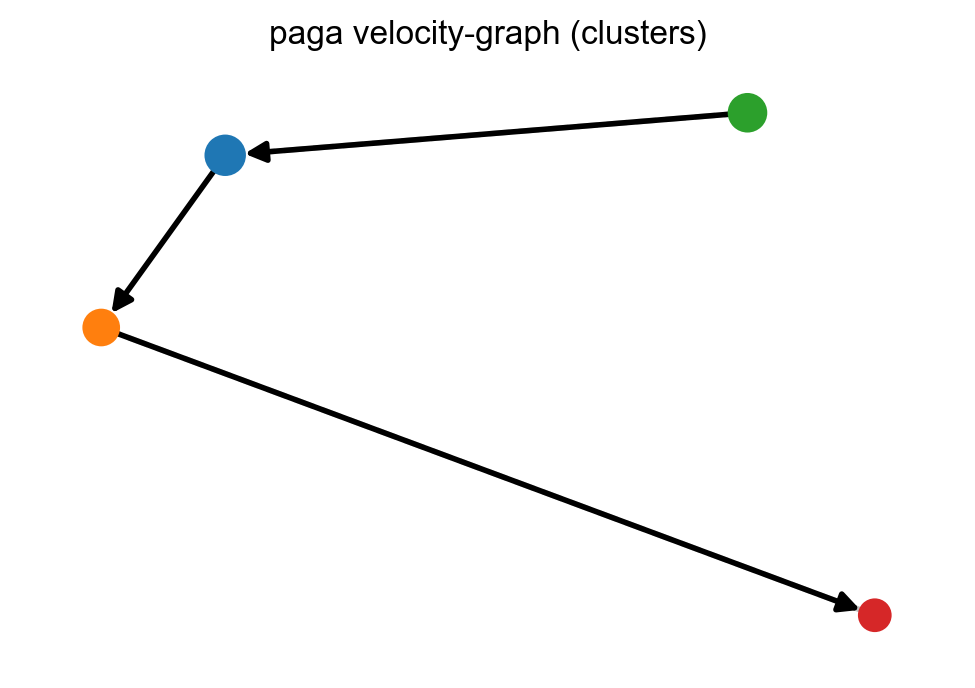

(None, None)

In [18]:
fig,ax=plt.subplots()
scv.pl.paga(adata_tot,basis='umap',min_edge_width=2,ax=ax,show=False)
# ax.invert_xaxis()
plt.show(),plt.close()
# plt.savefig('RNAvelo_Total_PAGA.svg'),plt.close()